In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = {
    "Hours_Studied": [2,3,1,4,5,6,7,8,9,2,
                      3,2,4,5,6,7,8,9,3,2,
                      4,5,6,7,8,9,1,2,6,7],
    "Sleep_Hours": [8,7,6,5,6,7,6,7,5,7,
                    6,5,6,5,6,7,6,7,8,6,
                    7,8,5,5,8,6,7,5,8,6],
    "Performance": ["Low","Low","Low","Medium","Medium","Medium","High","High","High","Low",
                    "Low","Low","Medium","Medium","Medium","High","High","High","Low","Low",
                    "Medium","Medium","Medium","High","High","High","Low","Low","Medium","High"]
}

df = pd.DataFrame(data)

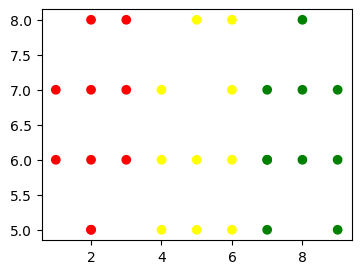

In [13]:
plt.figure(figsize=(4,3))
color = df['Performance'].map({'Low':'red','Medium':'yellow','High':'green'})
y_numeric = df['Performance'].map({'Low':0,'Medium':1,'High':2})
plt.scatter(df['Hours_Studied'],df['Sleep_Hours'],c=color)


<Figure size 400x300 with 0 Axes>

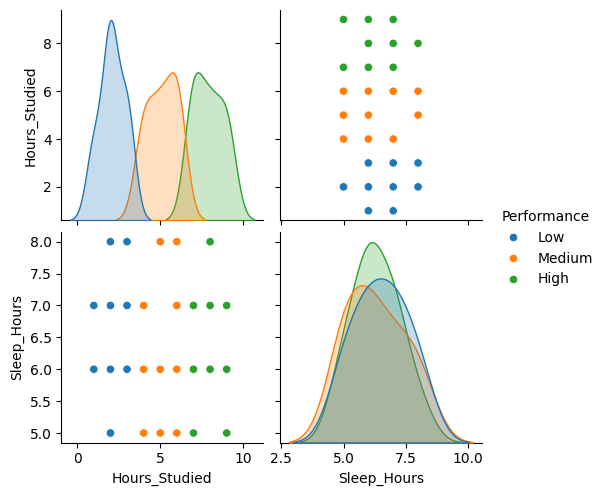

In [23]:
plt.figure(figsize=(4,3))
sns.pairplot(data=df,hue='Performance')
plt.show()

In [25]:
# from above KDE(continous curve) we can see that there is to much overlapping in Sleeps_Hours it will be difficult to classify
#(We can't get to much information) (weak feature)

# there is not much overallping in Hours_studied that is ideal. (strong feature)

In [14]:
X = df[['Hours_Studied','Sleep_Hours']]
y = df['Performance']

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model = LogisticRegression(multi_class='ovr')
model.fit(X,y)

C:\Users\Jay Sunil Sonawane\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [27]:
model.predict([[5,3]])

C:\Users\Jay Sunil Sonawane\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Medium'], dtype=object)

<h4>Ovr method is auto in Logistic Regression let's see it</h4>

In [29]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [30]:
model2.predict([[7,4]])

C:\Users\Jay Sunil Sonawane\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['High'], dtype=object)